In [4]:
import numpy as np

1) Find $N(a)$ s.t. 

$P(x|a) = N(a) a^{(-x^2/2)}$

is appropriately normalized.

$\int_{-\infty}^{\infty} N(a)a^{(-x^2/2)} dx = 1$

$\rightarrow N(a) \int_{-\infty}^{\infty} a^{-x^2/2}dx = 1$

$\rightarrow N(a) = [\int_{-\infty}^{\infty} a^{-x^2/2}dx]^{-1}$

$\boxed{\rightarrow N(a) = \sqrt{\frac{\ln(a)}{2\pi}}}$

3) Use Bayes's Thm. to calculate $P(a|{x})$ when one has multiple samples drawn, ie ${x} = (x_1,x_2,x_3,...,x_n)$.

Bayes's Thm:

\begin{equation}
P(A|B) = \frac{P(B|A)P(A)}{P(B)}
\end{equation}


Or, in our terms, 

$$P(a|\vec{x}) = \frac{P(\vec{x}|a)P(a)}{P(\vec{x})}$$

Critically, $P(x|a)\neq P(\vec{x}|a)$. So far, we have:

$$P(x|a) = \sqrt{\frac{\ln(a)}{2\pi}} a^{(-x^2/2)}$$

Since $x$ is generated by a "pure noise" Guassian, though, 

$$P(\vec{x}|a)=\prod_{i=1}^n P(x_i|a) = N^n(a)a^{-\sum_i x_i^2/2}$$



Taking P(a) to be uniform, and lazily letting B be a normalization constant, we can write:
$$P(a|\vec{x}) = B\frac{N^n(a)a^{-\sum_i x_i^2/2}}{P(\vec{x})}$$

Finally, I won't bother with explicitly normalizing $P(a|\vec{x})$ with respect to a, so the normalizing term $P(\vec{x})$ goes away, too:

$$P(a|\vec{x}) = BN^n(a)a^{-\sum_i x_i^2/2}$$

Which, referring to our previously-calculated factor N, is
$$P(a|\vec{x}) = B{\sqrt{\frac{\ln(a)}{2\pi}}}^na^{-\sum_i x_i^2/2}$$

Absorbing constants:

$$P(a|\vec{x}) = B\sqrt{{\ln(a)}^{n} a^{-\sum_i x_i^2}}$$

4) Draw 100 samples and plot the resulting $P(a|x)$.

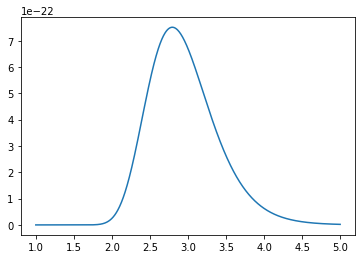

In [95]:
from numpy.random import normal 
from matplotlib import pyplot as plt


    

def plot_pr_a_given_vecx(vecx,a_range_to_plot):
    #constants
    n = len(vecx)
    sum_x_squared = sum([x**2 for x in vecx])
    
    lna_to_the_n = [np.log(a)**n for a in a_range_to_plot]
    a_exponentiated = [a**-sum_x_squared for a in a_range_to_plot]
    p_values = [np.sqrt(term1*term2) for term1, term2 in zip(lna_to_the_n,a_exponentiated)]
    
    plt.plot(a_range_to_plot,p_values)
    plt.show()

n_samples = 100
min_a = 1
max_a = 5

samples = [normal() for i in range(n_samples)]
range_for_a = np.linspace(min_a,max_a,1000)
plot_pr_a_given_vecx(samples,range_for_a)

5) Use the Metropolis-Hasting algorithm to sample from the posterior density and create a Markov chain.

I'll start from an initial guess of a = 2.5. I'll eyeball it and choose a variance of .5 for my generating function, which will be Gaussian.

In [98]:
def pr_a_given_vecx(vecx,a):
    n = len(vecx)
    sum_x_squared = sum([x**2 for x in vecx])
    lna_to_the_n = np.log(a)**n
    a_exponentiated = a**-sum_x_squared
    return np.sqrt(lna_to_the_n*a_exponentiated)
    
t = 0
x_0 = 2.5

x = [x_0]



5.475131299976556e-22
